<a href="https://colab.research.google.com/github/kauanpecanha/modlin/blob/master/trab1modlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das Bibliotecas

In [266]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from math import sqrt, pi, e

Definição das funções

In [267]:
def setDataframe(minimumNumber, maximumNumber, number_of_points, number_of_influencers, variety):
  yArr = []
  xArr = np.linspace(minimumNumber, maximumNumber, number_of_points)
  chosen = []
  for i in range(number_of_influencers):
    chosen.append(random.randint(i, i+variety))

  for i in range(len(xArr)):
    if i in chosen:
      yArr.append(random.randint(i, i+120))
    else:
      yArr.append(random.randint(i, i+35))

  return xArr, yArr

def saveData_intoCSV(x, y):
  with open("dataframe.csv", "w", newline="") as csvfile:
    titles=["X", "Y"]
    writer = csv.DictWriter(csvfile, fieldnames=titles)

    writer.writeheader()
    for i in range(len(x)):
      writer.writeow({"X": x[i], "Y": y[i]})

    return

def sum(arr):
  sum = 0
  for i in range(len(arr)):
    sum += arr[i]
  return sum

def media(arr):
  summ = sum(arr)
  return summ/len(arr)

def sumBoth(xArr, yArr):
  arr = []
  for i in range(len(xArr)):
    arr.append((xArr[i])*(yArr[i]))

  return sum(arr)

def squareSummatory(arr):
  sum = 0
  for i in range(len(arr)):
    sum += (arr[i]**2)
  return sum

def sumDeltas(arr, med, id):
  if(id == 1):
    sum = 0
    for i in range(len(arr)):
        sum += arr[i] - med
    return sum
  else:
    sum = 0
    for i in range(len(arr)):
      sum += ((arr[i] - med)**2)
    return sum

def beta1(sumXiYi, sumYi, sumXi, sumXiSquare, squareSumXi, size):
  return(
    ((sumXiYi) - ((1/size)*(sumXi)*(sumYi)))
    /
    (sumXiSquare - ((1/size)*(squareSumXi)))
  )

def beta0(size, sumYi, sumXi, beta1):
  return(
    (((1/size)*(sumYi)) - ((1/size)*(beta1)*(sumXi)))
  )


def normalDist(x, mi, sigma):
  dist = []
  for i in range(len(x)):
    dist.append(
      ((1)/(sigma) * (sqrt(2*pi)))
      *
      (e**((-1/2)*(((x[i] - mi)/(sigma))**2)))
    )
  return dist

def function(beta0, beta1, xIn, error):
  return beta0 + beta1 * xIn + error

def setSigmaSquare(yArr):
  return ((1/len(yArr)*(sumDeltas(yArr, media(y), 2))))

def calcResiduos(yArr, yf):
  resid = []
  for i in range(len(y)):
    resid.append(yArr[i] - yf[i])

  return resid


Definição dos valores iniciais necessários para a execução do programa

In [268]:
x = []
y = []
option = int(input("Entre com uma das opções a seguir: \n    1 - Valores Padrão\n    2 - Valores customizados(por você)\n\n\n Opção: "))
if(option == 1):
  beg = 0
  fin = 120
  quant = 200
  number_influencers = 25
  disp = 80

else:
  beg = int(input("Entre com o número inicial(recomendado: 0): "))
  fin = int(input("Entre com o número final de pontos(recomendado: 120): "))
  quant = int(input("Entre com a quantidade de pontos desejada(recomendado: 200): "))
  number_influencers = int(input("Entre com a qunatidade de possíveis pontos influentes desejada(recomendado: 5): "))
  disp = int(input("Entre com a dispersão dos pontos influentes(recomendado: 80): "))

x, y = setDataframe(beg, fin, quant, number_influencers, disp)

Entre com uma das opções a seguir: 
    1 - Valores Padrão
    2 - Valores customizados(por você)


 Opção: 1


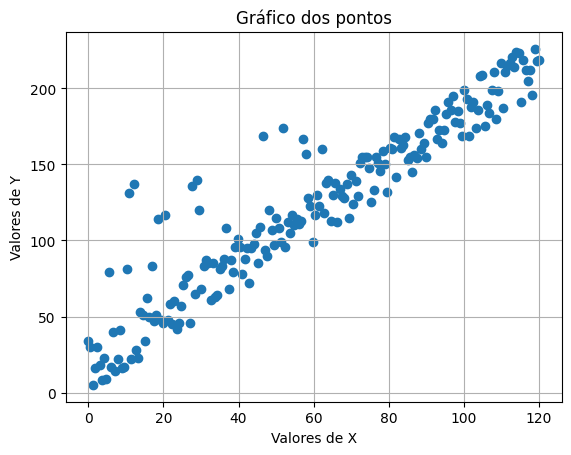

In [269]:
xm = media(x)
ym = media(y)

xSum = sum(x)
ySum = sum(y)
xiyiSum = sumBoth(x, y)
summatoryXsquare = squareSummatory(x)
squareSummatoryX = sum(x)**2
size = len(x)

b1 = beta1(xiyiSum, ySum, xSum, summatoryXsquare, squareSummatoryX, size)
b0 = beta0(size, ySum, xSum, b1)
plt.grid()
plt.scatter(x, y, label="Dados")
plt.title("Gráfico dos pontos")
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.show()

# letra a: Faça o gráfico das distribuições de cada uma das duas variáveis(Y e X) em dois gráficos diferentes

(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ,  13.2,  14.4,  15.6,  16.8,  18. ,  19.2,  20.4,
         21.6,  22.8,  24. ,  25.2,  26.4,  27.6,  28.8,  30. ,  31.2,
         32.4,  33.6,  34.8,  36. ,  37.2,  38.4,  39.6,  40.8,  42. ,
         43.2,  44.4,  45.6,  46.8,  48. ,  49.2,  50.4,  51.6,  52.8,
         54. ,  55.2,  56.4,  57.6,  58.8,  60. ,  61.2,  62.4,  63.6,
         64.8,  66. ,  67.2,  68.4,  69.6,  70.8,  72. ,  73.2,  74.4,
         75.6,  76.8,  78. ,  79.2,  80.4,  81.6,  82

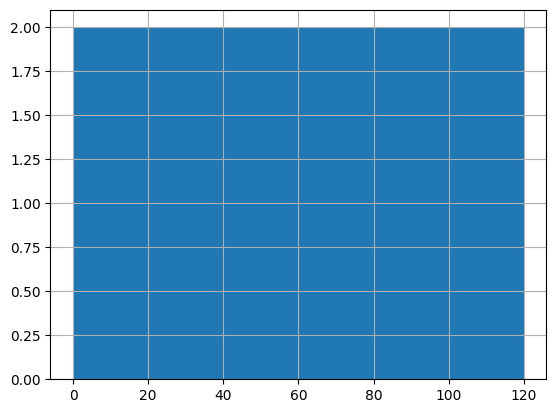

In [270]:
(n, bins) = np.histogram(x, 100)
plt.grid()
plt.hist(x, bins=bins)

(array([1., 2., 0., 0., 3., 3., 0., 2., 2., 0., 1., 2., 0., 2., 0., 1., 2.,
        0., 4., 3., 3., 1., 0., 2., 1., 2., 2., 1., 2., 1., 1., 0., 2., 3.,
        2., 3., 3., 4., 1., 0., 3., 4., 3., 1., 0., 2., 3., 3., 4., 4., 3.,
        1., 2., 3., 1., 2., 4., 3., 1., 3., 3., 3., 1., 2., 1., 1., 3., 7.,
        2., 1., 5., 3., 0., 5., 3., 1., 5., 2., 1., 3., 2., 4., 2., 1., 3.,
        2., 1., 3., 0., 0., 1., 1., 1., 4., 1., 3., 3., 1., 1., 2.]),
 array([  5.  ,   7.21,   9.42,  11.63,  13.84,  16.05,  18.26,  20.47,
         22.68,  24.89,  27.1 ,  29.31,  31.52,  33.73,  35.94,  38.15,
         40.36,  42.57,  44.78,  46.99,  49.2 ,  51.41,  53.62,  55.83,
         58.04,  60.25,  62.46,  64.67,  66.88,  69.09,  71.3 ,  73.51,
         75.72,  77.93,  80.14,  82.35,  84.56,  86.77,  88.98,  91.19,
         93.4 ,  95.61,  97.82, 100.03, 102.24, 104.45, 106.66, 108.87,
        111.08, 113.29, 115.5 , 117.71, 119.92, 122.13, 124.34, 126.55,
        128.76, 130.97, 133.18, 135.39, 137.6 

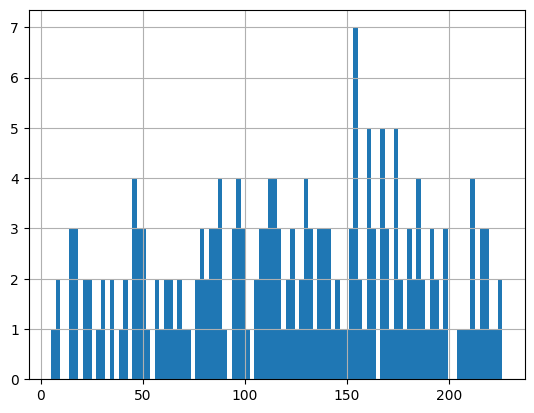

In [271]:
(m, bins) = np.histogram(y, 100)
plt.grid()
plt.hist(y, bins=bins)

# Letra B: Através das distribuições é possível identificar pontos influentes em alguma das variáveis? Comente.
Resposta: Não, não é possível. Nota-se como os pontos influentes, em pouca quantidade em relação aos pontos comuns, não detém tanto efeito.

# Letra C: Faça o gráfico xy do conjunto de dados. Visualmente, é possível identificar alguma correlação entre as variáveis?
Resposta: Sim, é possível visualizar alguma correlação, uma vez que parecem ser diretamente dependentes uma da outra, no que tange à proporcionalidade.

# Letra D: Calcule o coeficiente de correlação e comente o resultado.

In [272]:
def setCorrelationCoef(Sxx, Syy):
  return((b1) * ((Sxx/Syy)**(1/2)))

sxx = sumDeltas(x, media(x), 2)
syy = sumDeltas(y, media(y), 2)

correlationCoef = setCorrelationCoef(sxx, syy)
print(f"Resposta da D: O coeficiente de correlação entre essas duas variáveis é: {correlationCoef:.2f}")

Resposta da D: O coeficiente de correlação entre essas duas variáveis é: 0.94


# Letra E: Encontre a reta de quadrados mínimos (estime β0, β1 e σ2)
# Letra F: Faça o gráfico os dados no plano xy incluindo a reta de quadrados mínimos encontrada no item anterior.

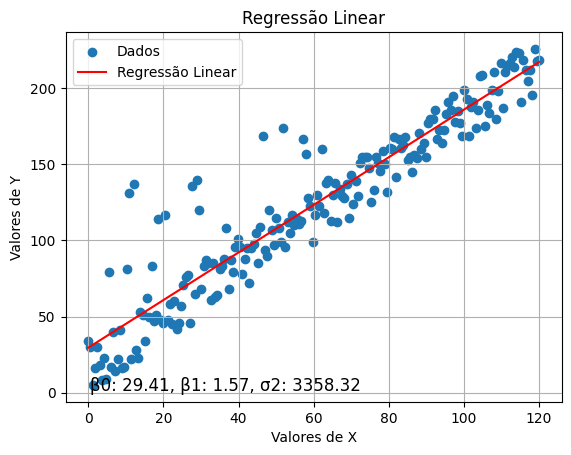

In [273]:
b1 = beta1(xiyiSum, ySum, xSum, summatoryXsquare, squareSummatoryX, size)
b0 = beta0(size, ySum, xSum, b1)
sigmaSquare = setSigmaSquare(y)

plt.grid()
plt.title("Regressão Linear")
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.scatter(x, y, label="Dados")
plt.plot(x, function(b0, b1, x, sum(normalDist(x, media(x), 1))/len(x)), color='red', label='Regressão Linear')
plt.text(0.5, 0.95, f'β0: {b0:.2f}, β1: {b1:.2f}, σ2: {sigmaSquare:.2f}', size=12)
plt.legend()
plt.show()

# Letra G: Calcule os resíduos ei = yi - y^

Resíduos:
[4.53730490690257, -0.4071112035001896, -26.35152731390295, -16.29594342430571, -3.2403595347084675, -16.18477564511123, -27.129191755513993, -13.073607865916749, -28.018023976319512, 41.03755991327773, -21.90685619712503, 0.14872769247221385, -26.79568841793055, -19.740104528333312, -1.6845206387360676, -27.62893674913883, -27.573352859541593, 35.48223103005565, 84.5378149196529, -25.406601190749875, 88.64898269884736, -21.295433411555386, -27.23984952195815, 1.815734367639088, -1.1286817427636677, -19.07309785316643, 7.982486036430807, -4.961930073971949, 27.093653815625295, -9.850762294777475, -6.795178405180231, 55.260405484417014, -11.68401062598575, -14.628426736388512, 55.42715715320873, -14.51725895719403, -5.4616750675967864, -19.406091177999556, -5.350507288402326, -24.294923398805082, -21.239339509207838, -11.183755619610594, 1.8718282699866506, 5.927412159583881, 5.982996049181125, -25.961420061221645, 63.0941638283756, -8.850252282027157, 65.20533160757009, 44.26

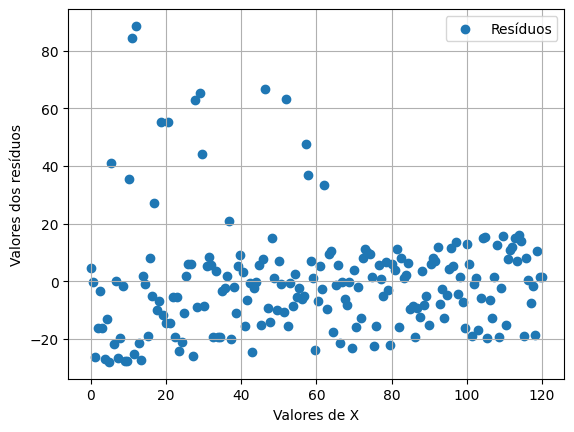

In [274]:
yObserved = function(b0, b1, x, sum(normalDist(x, media(x), 1))/len(x))
residuos = calcResiduos(y, yObserved)
print(f"Resíduos:\n{residuos}")

plt.grid()
plt.scatter(x, residuos, label="Resíduos")
plt.xlabel("Valores de X")
plt.ylabel("Valores dos resíduos")
plt.legend()
plt.show()

Sobre a Questão H, pode-se ver nitidamente a influência que os pontos influentes tiveram sobre o cálculo do resíduo, uma vez que configuram pontos muito distantes dos demais. Em contrapartida, os histogramas não representam com nitidez a quantidade de pontos influentes.

# Letra I: Monte a tabela ANOVA e, para o intervalo de confiança de 95%, verifique se a hipótese nula (modelo simples) é rejeitada (utilize a tabela da distribuição F do livro).


In [275]:
SQReq = ((b1)**2)*(sxx)
SQT = (syy)
SQE = SQT - SQReq

GL = [1, size-2, size-1]
SQ = [SQReq, SQE, SQT]
QM = [SQReq, SQE/(size-2), 0]
F0 = [SQReq/(SQE/(size-2)), 0, 0]

print("   GL   |   SQ   |   QM   |   F0   ")
for i in range(len(GL)):
  print(f"   {GL[i]}   {SQ[i]:.2f}      {QM[i]:.2f}      {F0[i]:.2f}   ")

studentCoef = (correlationCoef*(sqrt(size-2)))/(sqrt(1-(correlationCoef**2)))
print(f"\nO valor do coeficiente de student é: {studentCoef:.2f}")

if(F0[0] > studentCoef):
  print("Rejeita-se a hipótese: B1 = 0 (modelo simples rejeitado)")
else:
  print("Rejeita-se a hipótese: B1 != 0 (modelo de regressão linear simples)")

   GL   |   SQ   |   QM   |   F0   
   1   594599.66      594599.66      1527.71   
   198   77063.46      389.21      0.00   
   199   671663.12      0.00      0.00   

O valor do coeficiente de student é: 39.09
Rejeita-se a hipótese: B1 = 0 (modelo simples rejeitado)


# Letra J: Retire os pontos classificados como influentes e repita os passos E e F. Comente sobre os resultados.

Tamanho das listas antes: x:200, y:200, residuos=200
Tamanho das listas depois: x:184, y:184, residuos=184


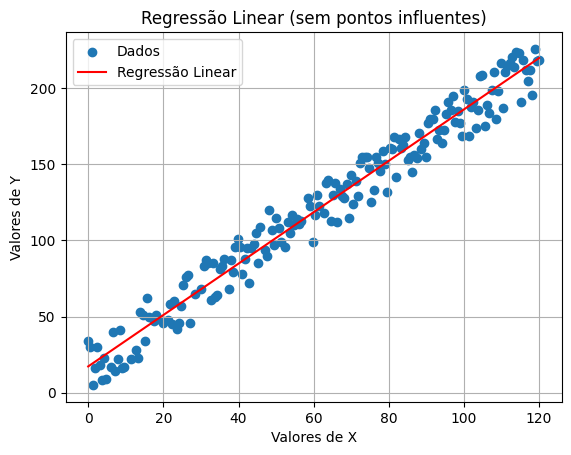

In [276]:
print(f"Tamanho das listas antes: x:{len(x)}, y:{len(y)}, residuos={len(residuos)}")

while(True):

  if(max(residuos)>20):
    i = np.where(residuos == max(residuos))
    x = np.delete(x, i)
    y = np.delete(y, i)
    yObserved = function(b0, b1, x, sum(normalDist(x, media(x), 1))/len(x))
    residuos = calcResiduos(y, yObserved)

  else:
    break

print(f"Tamanho das listas depois: x:{len(x)}, y:{len(y)}, residuos={len(residuos)}")

# Redefinindo os valores, após exclusão dos pontos influentes
xm = media(x)
ym = media(y)

xSum = sum(x)
ySum = sum(y)
xiyiSum = sumBoth(x, y)
summatoryXsquare = squareSummatory(x)
squareSummatoryX = sum(x)**2
size = len(x)

# redefinição de beta 0 e beta 1, após exclusão dos pontos influentes
b1 = beta1(xiyiSum, ySum, xSum, summatoryXsquare, squareSummatoryX, size)
b0 = beta0(size, ySum, xSum, b1)
sigmaSquare = setSigmaSquare(y)

# plotagem do novo gráfico após exclusão dos pontos influentes
plt.grid()
plt.title("Regressão Linear (sem pontos influentes)")
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.scatter(x, y, label="Dados")
plt.plot(x, function(b0, b1, x, sum(normalDist(x, media(x), 1))/len(x)), color='red', label='Regressão Linear')
plt.legend()
plt.show()